In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from model import GANomaly

def batch_resize(imgs, size: tuple):
    img_out = np.empty((imgs.shape[0],) + size)
    for i in range(imgs.shape[0]):
        img_out[i] = cv2.resize(imgs[i], size, interpolation=cv2.INTER_CUBIC)
    return img_out

2.0.0-rc0


In [2]:
class Option:
    def __init__(self):
        self.anomaly = 2
        self.shuffle_buffer_size = 10000
        self.batch_size = 300
        self.isize = 32
        self.ckpt_dir = "ckpt"
        self.nz = 100
        self.nc = 1
        self.ndf = 64
        self.ngf = 64
        self.extralayers = 0
        self.niter = 15
        self.lr = 2e-4
        self.w_adv = 1. # Adversarial loss weight
        self.w_con = 50. # Reconstruction loss weight
        self.w_enc = 1. # Encoder loss weight.
        self.beta1 = 0.5
            
opt = Option()

In [3]:
# dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()
x_train, y_train = data_train
x_test, y_test = data_test
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# resize to (32, 32)
x_train = batch_resize(x_train, (32, 32))[..., None]
x_test = batch_resize(x_test, (32, 32))[..., None]
# normalization
mean = x_train.mean()
stddev = x_train.std()
x_train = (x_train-mean)/stddev
x_test = (x_test-mean)/stddev
print(x_train.shape, x_train.shape)
# define abnoraml data and normal
# training data only contains normal
x_train = x_train[y_train!=opt.anomaly]
y_train = y_train[y_train!=opt.anomaly]
y_test = (y_test==opt.anomaly).astype(np.float32)
# tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.shuffle(opt.shuffle_buffer_size).batch(opt.batch_size, drop_remainder=True)
test_dataset = test_dataset.batch(opt.batch_size, drop_remainder=False)

(60000, 32, 32, 1) (60000, 32, 32, 1)


In [4]:
ganomaly = GANomaly(opt, train_dataset, valid_dataset=None, test_dataset=test_dataset)

In [5]:
ganomaly.fit(opt.niter, best_state_ths=0.9)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch: 0, G_loss

epoch: 1, G_losses: 19.8691, D_losses: 0.0350, samples/sec: 6139.4658
	 Testing:   roc_auc: 0.8033   average_precision: 0.3044


epoch: 2, G_losses: 16.5853, D_losses: 0.0083, samples/sec: 6145.9614
*** 	 Testing:   roc_auc: 0.9270   average_precision: 0.5329 ***


epoch: 3, G_losses: 15.1270, D_losses: 0.0062, samples/sec: 6037.8540
*** 	 Testing:   roc_auc: 0.9359   average_precision: 0.6143 ***


epoch: 4, G_losses: 14.2861, D_losses: 0.0048, samples/sec: 6104.1331
*** 	 Testing:   roc_auc: 0.9428   average_precision: 0.6293 ***


epoch: 5, G_losses: 13.7438, D_losses: 0.0028, samples/sec: 6141.2592
	 Testing:   roc_auc: 0.9328   average_precision: 0.5647


epoch: 6, G_losses: 13.3119, D_losses: 1.9223, samples/sec: 6102.7250
	 Testing:   roc_auc: 0.9291   average_precision: 0.5547


epoch: 7, G_losses: 12.7564, D_losses: 7.6666, samples/sec: 6213.7328
	 Testing:   roc_auc: 0.9224   average_precision: 0.5374


epoch: 8, G_losses: 12.5308, D_losses: 7.6666, samples/sec: 6208.6020
*** 	 Testing:   roc_auc: 0.9505   average_precision: 0.5979 ***


epoch: 9, G_losses: 12.3455, D_losses: 7.6666, samples/sec: 6155.6177
	 Testing:   roc_auc: 0.9403   average_precision: 0.5663


epoch: 10, G_losses: 12.2017, D_losses: 7.6666, samples/sec: 6316.5766
	 Testing:   roc_auc: 0.9292   average_precision: 0.5446


epoch: 11, G_losses: 12.0742, D_losses: 7.6666, samples/sec: 6218.4129
	 Testing:   roc_auc: 0.9447   average_precision: 0.5733


epoch: 12, G_losses: 11.9629, D_losses: 7.6666, samples/sec: 6280.6937
	 Testing:   roc_auc: 0.9321   average_precision: 0.5382


epoch: 13, G_losses: 11.8718, D_losses: 7.6666, samples/sec: 6278.5051
	 Testing:   roc_auc: 0.9209   average_precision: 0.5041


epoch: 14, G_losses: 11.7929, D_losses: 7.6666, samples/sec: 6313.5602
	 Testing:   roc_auc: 0.9160   average_precision: 0.4977


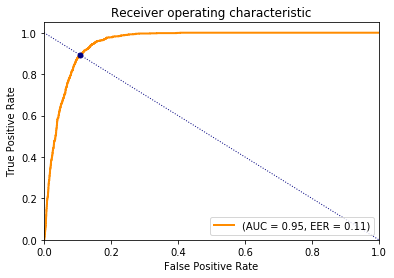

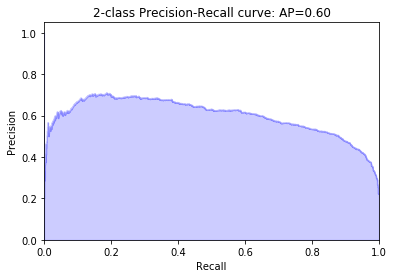

In [6]:
ganomaly.evaluate_best(test_dataset)